Vincular con drive de la cuenta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Etapa de inicialización

In [ ]:
import pandas as pd

# Leer el archivo de Excel
filename ='/content/drive/My Drive/Colab Notebooks/Notebooks/Base Demanda Diaria 2017 2023.xlsx'
Sheet_DatosRegion = 'Datos Región'
df = pd.read_excel(filename, sheet_name=Sheet_DatosRegion)

In [ ]:
#Saber la dimensión del data set df

df.shape


(2556, 15)

Primeras impresiones del dataset

In [ ]:
#Saber si una columna tiene datos nulo

print ('Valores nulo de Gran Bs As: ', df['GRAN BS.AS.'].isnull().any())
print ('Valores nulo de temperatura de Gran Bs As: ', df['TEMPERATURA REFERENCIA MEDIA GBA °C'].isnull().any())
print ('Valores nulo de años: ', df['AÑO'].isnull().any())
print ('Valores nulo de tipo de día: ', df['Tipo día'].isnull().any())
print ('Valores nulo de mes: ', df['MES'].isnull().any())
print ('Valores nulo de fecha: ', df['Fecha'].isnull().any())

Valores nulo de Gran Bs As:  False
Valores nulo de temperatura de Gran Bs As:  False
Valores nulo de años:  False
Valores nulo de tipo de día:  False
Valores nulo de mes:  False
Valores nulo de fecha:  False


Crear diagramas de cajas filtrados por año

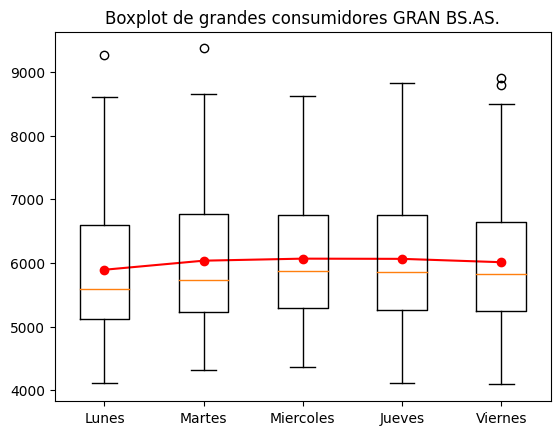

In [ ]:
# Diagramas de cajas luego de eliminar los datos de fines de semanas y feriados
# Extraer los datos de una columna y convertirlos en un array
# Se realiza un filtro por cada año para graficar los diagramas de cajas por año
import numpy as np
import matplotlib.pyplot as plt

df_mask = df['Tipo día'] == "Lunes habiles"
filtered_df = df[df_mask]

dataLun = filtered_df['GRAN BS.AS.'].to_numpy()

df_mask=df['Tipo día']=="Martes Habiles"
filtered_df = df[df_mask]

dataMar = filtered_df['GRAN BS.AS.'].to_numpy()

df_mask=df['Tipo día']=="Miercoles habiles"
filtered_df = df[df_mask]

dataMier = filtered_df['GRAN BS.AS.'].to_numpy()

df_mask=df['Tipo día']=="Jueves Habiles"
filtered_df = df[df_mask]

dataJue = filtered_df['GRAN BS.AS.'].to_numpy()

df_mask=df['Tipo día']=="Viernes habiles"
filtered_df = df[df_mask]

dataVier = filtered_df['GRAN BS.AS.'].to_numpy()

data=[dataLun, dataMar, dataMier, dataJue, dataVier]

# Calcular la media de cada conjunto de datos
means = [np.mean(d) for d in data]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar las medias como puntos
ax.plot(range(1, len(means)+1), means, 'ro')

# Conectar las medias con una línea que comienza en un punto específico
start_point = (1, means[0])
x = [start_point[0]] + list(range(1, len(means)+1))
y = [start_point[1]] + means
ax.plot(x, y, 'r-')

# Crear el boxplot
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5], ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'])
plt.title("Boxplot de grandes consumidores GRAN BS.AS.")
plt.show()

Se realiza un histograma del data set para ver las frecuencias de los mayores consumos del Gran Buenos Aires

<ipython-input-35-279a16ad92dd>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu_r')


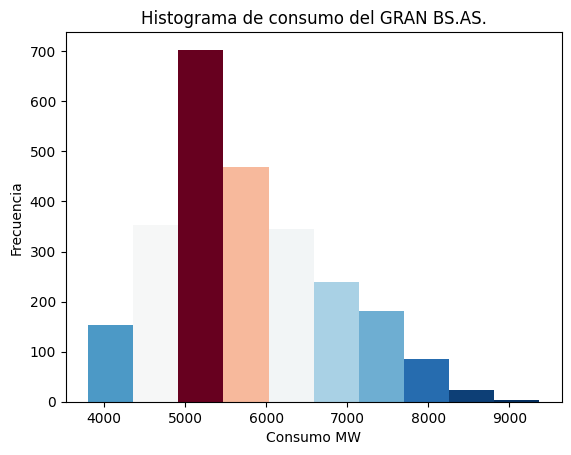

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

data = df['GRAN BS.AS.']
n, bins, patches = plt.hist(data)

norm = Normalize(vmin=min(n), vmax=max(n))
cmap = cm.get_cmap('RdBu_r')

for n_i, patch in zip(n, patches):
    color = cmap(norm(n_i))
    patch.set_fc(color)

plt.title('Histograma de consumo del GRAN BS.AS.')
plt.xlabel('Consumo MW')
plt.ylabel('Frecuencia')
plt.show()

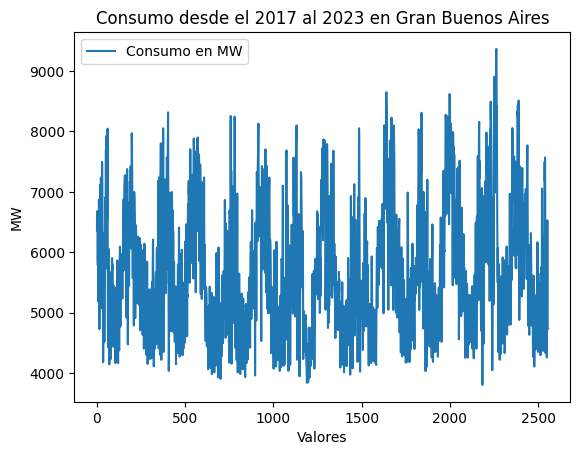

In [ ]:
# Crea un gráfico de lineas
plt.plot(df['GRAN BS.AS.'], label='Consumo en MW')

# Establecer el título y las etiquetas de los ejes
plt.title("Consumo desde el 2017 al 2023 en Gran Buenos Aires")
plt.ylabel("Consumo en MW")
plt.xlabel("Tiempo")

# Muestra la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


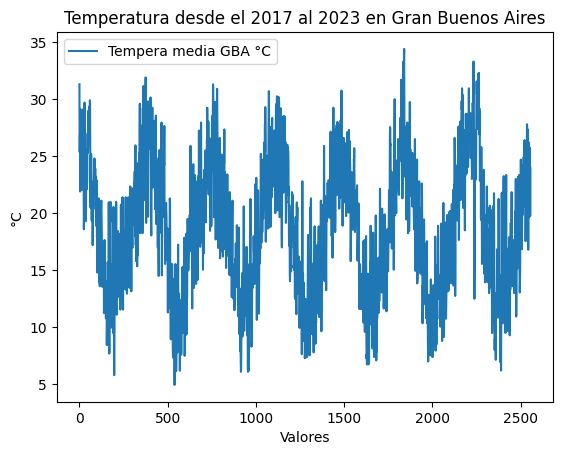

In [ ]:
# Crea un gráfico de lineas
plt.plot(df['TEMPERATURA REFERENCIA MEDIA GBA °C'], label='Tempera media GBA °C')

# Establecer el título y las etiquetas de los ejes
plt.title("Temperatura desde el 2017 al 2023 en Gran Buenos Aires")
plt.ylabel("°C")
plt.xlabel("Valores")

# Muestra la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

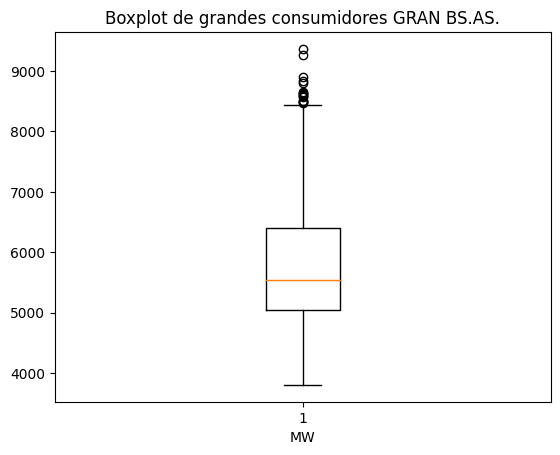

In [ ]:
# Crear el boxplot
plt.boxplot(df['GRAN BS.AS.'])
plt.xlabel('MW')
plt.title("Boxplot de grandes consumidores GRAN BS.AS.")
plt.show()

In [ ]:
Crear un histograma por cada variable del dataset df_procesado y que se puedan ver cada uno en un unico grafico

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes[0, 0].hist(df_procesado['MES_NUM'])
axes[0, 0].set_title('MES')
axes[0, 1].hist(df_procesado['Tipo_dia_valor'])
axes[0, 1].set_title('Tipo_dia_valor')
axes[1, 0].hist(df_procesado['TEMPERATURA REFERENCIA MEDIA GBA °C'])
axes[1, 0].set_title('TEMPERATURA REFERENCIA MEDIA GBA °C')
axes[1, 1].hist(df_procesado['GRAN BS.AS.'])
axes[1, 1].set_title('GRAN BS.AS.')
plt.tight_layout()
plt.show()